<a href="https://colab.research.google.com/github/kerenalli/DAA-2024-25/blob/main/daa_assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inorder Traversal: [4, 2, 5, 1, 6, 3, 7]
Preorder Traversal: [1, 2, 4, 5, 3, 6, 7]
Postorder Traversal: [4, 5, 2, 6, 7, 3, 1]


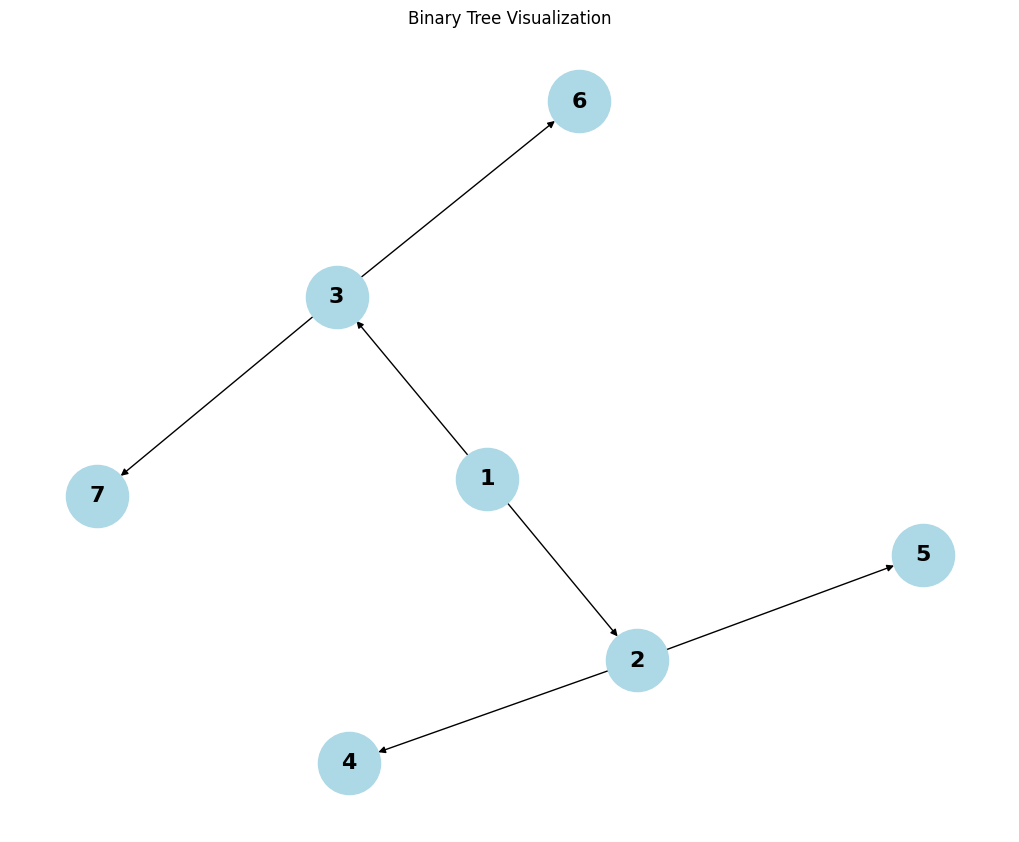

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

class TreeNode:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.value = key

def inorder_traversal(root, result):
    if root:
        inorder_traversal(root.left, result)
        result.append(root.value)
        inorder_traversal(root.right, result)

def preorder_traversal(root, result):
    if root:
        result.append(root.value)
        preorder_traversal(root.left, result)
        preorder_traversal(root.right, result)

def postorder_traversal(root, result):
    if root:
        postorder_traversal(root.left, result)
        postorder_traversal(root.right, result)
        result.append(root.value)

def create_sample_tree():
    root = TreeNode(1)
    root.left = TreeNode(2)
    root.right = TreeNode(3)
    root.left.left = TreeNode(4)
    root.left.right = TreeNode(5)
    root.right.left = TreeNode(6)
    root.right.right = TreeNode(7)
    return root

def visualize_tree(root):
    G = nx.DiGraph()
    def add_edges(node):
        if node:
            if node.left:
                G.add_edge(node.value, node.left.value)
                add_edges(node.left)
            if node.right:
                G.add_edge(node.value, node.right.value)
                add_edges(node.right)
    add_edges(root)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=16, font_weight="bold", arrows=True)
    plt.title("Binary Tree Visualization")
    plt.show()

def main():
    root = create_sample_tree()

    # Perform Traversals
    inorder_result = []
    preorder_result = []
    postorder_result = []

    inorder_traversal(root, inorder_result)
    preorder_traversal(root, preorder_result)
    postorder_traversal(root, postorder_result)

    print("Inorder Traversal:", inorder_result)
    print("Preorder Traversal:", preorder_result)
    print("Postorder Traversal:", postorder_result)

    # Visualize the Tree
    visualize_tree(root)

if __name__ == "__main__":
    main()


Hamiltonian Cycle: [0, 1, 2, 3, 4, 0]


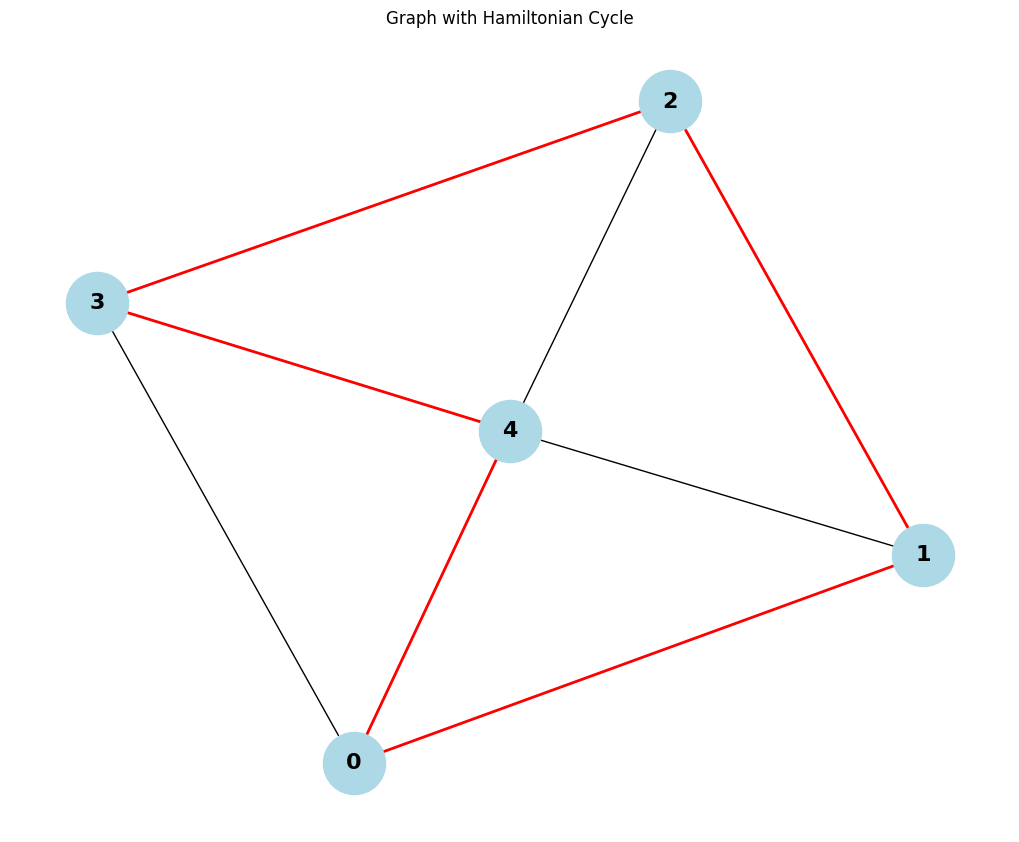

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

def is_valid(v, pos, path, graph):
    if graph[path[pos - 1]][v] == 0:
        return False
    if v in path:
        return False
    return True

def ham_cycle_util(graph, path, pos):
    if pos == len(graph):
        return graph[path[pos - 1]][path[0]] == 1

    for v in range(1, len(graph)):
        if is_valid(v, pos, path, graph):
            path[pos] = v
            if ham_cycle_util(graph, path, pos + 1):
                return True
            path[pos] = -1
    return False

def find_hamiltonian_cycle(graph):
    path = [-1] * len(graph)
    path[0] = 0
    if not ham_cycle_util(graph, path, 1):
        return None
    return path + [path[0]]

def create_graph():
    G = nx.Graph()
    G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (0, 4), (1, 4), (2, 4), (3, 4)])
    adj_matrix = nx.adjacency_matrix(G).todense().tolist()
    return G, adj_matrix

def visualize_graph(G, path=None):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=16, font_weight="bold", arrows=True)
    if path:
        path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)] + [(path[-1], path[0])]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    plt.title("Graph with Hamiltonian Cycle")
    plt.show()

def main():
    G, adj_matrix = create_graph()
    cycle = find_hamiltonian_cycle(adj_matrix)

    if cycle:
        print("Hamiltonian Cycle:", cycle)
        visualize_graph(G, cycle)
    else:
        print("No Hamiltonian Cycle found.")

if __name__ == "__main__":
    main()


In [4]:
# prompt: 12. Branch and Bound: Traveling Salesperson Problem (TSP)
# Problem Definition: Solve the Traveling Salesperson Problem using the Branch and Bound method. Find the shortest route that visits each city exactly once and returns to the starting city.
# Constraints: The number of cities should be manageable. Ensure that the optimal route is found.
# Expected Outcomes: Provide the shortest route and analyze

import math

def tsp_branch_and_bound(graph):
    """
    Solves the Traveling Salesperson Problem (TSP) using the Branch and Bound method.

    Args:
      graph: A 2D list representing the distance matrix between cities.

    Returns:
      A tuple containing the shortest route and its total distance.
    """
    n = len(graph)

    # Initialize variables
    min_cost = math.inf
    best_path = []

    # Create a list to store the current path
    path = [0] * (n + 1)
    path[0] = 0  # Start with city 0
    path[n] = 0  # Return to city 0

    # Create a list to store the visited cities
    visited = [False] * n
    visited[0] = True

    # Function to calculate the lower bound
    def calculate_lower_bound(current_cost, level):
        bound = current_cost
        for i in range(n):
            if not visited[i]:
                min_edge = math.inf
                for j in range(n):
                    if not visited[j] and graph[i][j] < min_edge:
                        min_edge = graph[i][j]
                bound += min_edge
        return bound

    # Recursive function to find the shortest path
    def tsp_recursive(current_cost, level):
        nonlocal min_cost, best_path

        if level == n:
            if graph[path[level - 1]][path[0]] != 0:  # Check if there's an edge back to the starting city
                current_cost += graph[path[level - 1]][path[0]]
                if current_cost < min_cost:
                    min_cost = current_cost
                    best_path = path.copy()
            return

        for i in range(n):
            if not visited[i] and graph[path[level - 1]][i] != 0:
                temp = current_cost + graph[path[level - 1]][i]
                lower_bound = calculate_lower_bound(temp, level)
                if lower_bound < min_cost:
                    path[level] = i
                    visited[i] = True
                    tsp_recursive(temp, level + 1)
                    visited[i] = False

    # Start the recursive function
    tsp_recursive(0, 1)

    return best_path, min_cost

# Example usage:
graph = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]
best_path, min_cost = tsp_branch_and_bound(graph)
print("Shortest Route:", best_path)
print("Total Distance:", min_cost)


Shortest Route: [0, 1, 3, 2, 0]
Total Distance: 80


Optimal Path: [0, 1, 3, 4, 2, 0]
Optimal Cost: 85


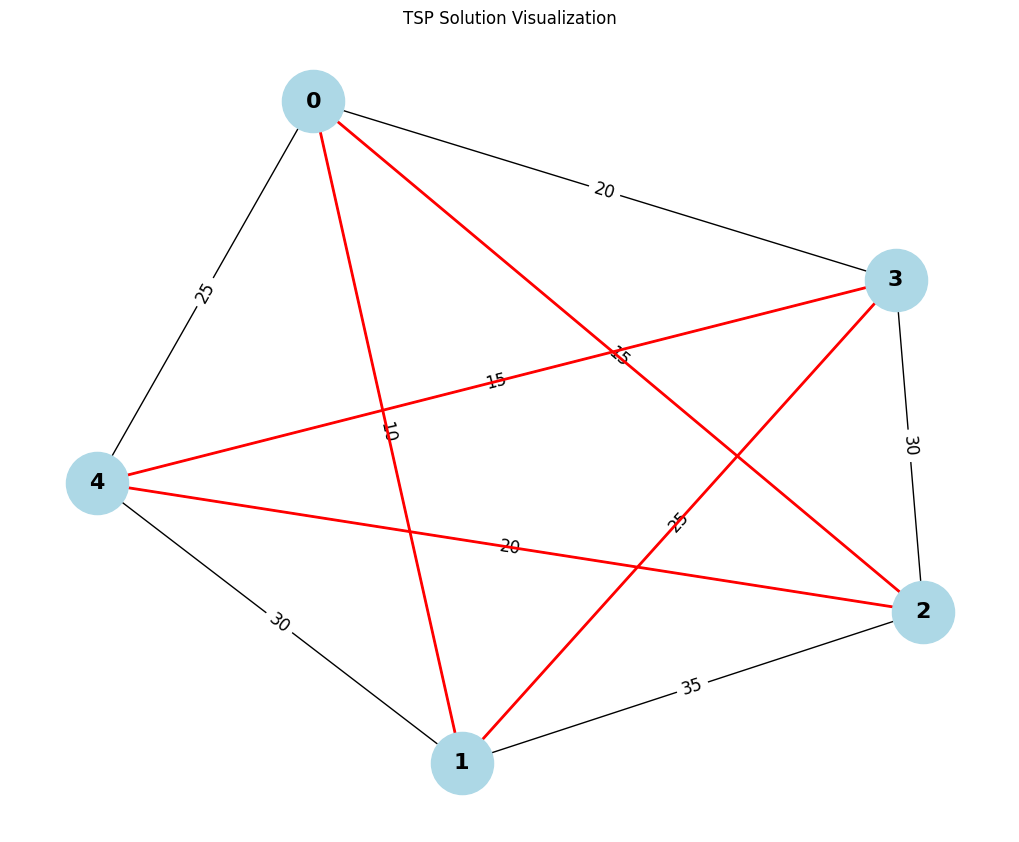

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

class Node:
    def __init__(self, path, cost, level):
        self.path = path
        self.cost = cost
        self.level = level

def tsp_branch_and_bound(distance_matrix):
    n = len(distance_matrix)
    best_cost = float('inf')
    best_path = []

    def bound(node):
        if node.cost >= best_cost:
            return float('inf')
        bound = node.cost
        for i in range(n):
            if i not in node.path:
                min_edge = min(distance_matrix[i][j] for j in range(n) if j not in node.path)
                bound += min_edge
        return bound

    def branch_and_bound():
        nonlocal best_cost, best_path
        root = Node([0], 0, 0)
        queue = [root]
        while queue:
            node = queue.pop(0)
            if node.level == n - 1:
                path_cost = node.cost + distance_matrix[node.path[-1]][0]
                if path_cost < best_cost:
                    best_cost = path_cost
                    best_path = node.path + [0]
            else:
                for i in range(n):
                    if i not in node.path:
                        new_cost = node.cost + distance_matrix[node.path[-1]][i]
                        new_path = node.path + [i]
                        new_node = Node(new_path, new_cost, node.level + 1)
                        if bound(new_node) < best_cost:
                            queue.append(new_node)

    branch_and_bound()
    return best_path, best_cost

def create_distance_matrix():
    # Example distance matrix for 5 cities
    return np.array([
        [0, 10, 15, 20, 25],
        [10, 0, 35, 25, 30],
        [15, 35, 0, 30, 20],
        [20, 25, 30, 0, 15],
        [25, 30, 20, 15, 0]
    ])

def visualize_graph(distance_matrix, path):
    G = nx.Graph()
    n = len(distance_matrix)
    for i in range(n):
        for j in range(i + 1, n):
            G.add_edge(i, j, weight=distance_matrix[i][j])

    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=16, font_weight="bold", arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_size=12)

    # Highlight the optimal path
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)] + [(path[-1], path[0])]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

    plt.title("TSP Solution Visualization")
    plt.show()

def main():
    distance_matrix = create_distance_matrix()
    path, cost = tsp_branch_and_bound(distance_matrix)

    print("Optimal Path:", path)
    print("Optimal Cost:", cost)

    visualize_graph(distance_matrix, path)

if __name__ == "__main__":
    main()
